In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve

### Load the data

In [63]:
df = pd.read_excel('../../data_set/monthlyInvestigation/cleaned_monthly_investigations.xlsx')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Subject_ID                399 non-null    object        
 1   Month                     399 non-null    datetime64[ns]
 2   Albumin (g/L)             399 non-null    float64       
 3   BU - post HD              399 non-null    float64       
 4   BU - pre HD               399 non-null    float64       
 5   Hb (g/dL)                 399 non-null    float64       
 6   S Ca (mmol/L)             399 non-null    float64       
 7   SCR- post HD (µmol/L)     399 non-null    float64       
 8   SCR- pre HD (µmol/L)      399 non-null    float64       
 9   Serum K Post-HD (mmol/L)  399 non-null    float64       
 10  Serum K Pre-HD (mmol/L)   399 non-null    float64       
 11  Serum Na Pre-HD (mmol/L)  399 non-null    float64       
 12  UA (mg/dL)            

### Compute Urea Reduction Rate (URR)

In [65]:
df['URR'] = ((df['BU - pre HD'] - df['BU - post HD']) / df['BU - pre HD']) * 100
df['URR'] = df['URR'].round(3)

In [66]:
print(df[['BU - pre HD', 'BU - post HD', 'URR']].head())

   BU - pre HD  BU - post HD     URR
0        13.50          0.26  98.074
1        14.14          0.38  97.313
2        12.30          5.85  52.439
3        18.90          6.30  66.667
4        14.79          6.75  54.361


### Create the Target

In [67]:
df['target'] = (df['URR'] < 65).astype(int)

In [68]:
print(df[['BU - pre HD', 'BU - post HD', 'URR', 'target']].head())

   BU - pre HD  BU - post HD     URR  target
0        13.50          0.26  98.074       0
1        14.14          0.38  97.313       0
2        12.30          5.85  52.439       1
3        18.90          6.30  66.667       0
4        14.79          6.75  54.361       1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Subject_ID                399 non-null    object        
 1   Month                     399 non-null    datetime64[ns]
 2   Albumin (g/L)             399 non-null    float64       
 3   BU - post HD              399 non-null    float64       
 4   BU - pre HD               399 non-null    float64       
 5   Hb (g/dL)                 399 non-null    float64       
 6   S Ca (mmol/L)             399 non-null    float64       
 7   SCR- post HD (µmol/L)     399 non-null    float64       
 8   SCR- pre HD (µmol/L)      399 non-null    float64       
 9   Serum K Post-HD (mmol/L)  399 non-null    float64       
 10  Serum K Pre-HD (mmol/L)   399 non-null    float64       
 11  Serum Na Pre-HD (mmol/L)  399 non-null    float64       
 12  UA (mg/dL)            

### Define x and y

In [70]:
x = df.drop( columns=["Subject_ID", "Month", "URR", "target"] )
y = df["target"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42 )

In [72]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (319, 11) (319,)
Test set shape: (80, 11) (80,)


# Train the ML Model

- 319 training samples
- 11 features
- Binary classification task (URR < 65 as target)

## Random Forest

In [74]:
modelRandomForest = RandomForestClassifier(random_state=42)
modelRandomForest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## XGBoost

In [42]:
modelXGBoost = XGBClassifier(random_state=42)
modelXGBoost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

## Support Vector Machine (SVM)

In [53]:
modelSVM = SVC(probability=True)
modelSVM.fit(X_train, y_train)

SVC(probability=True)

## Logistic Regression

In [44]:
modelLogisticRegression = LogisticRegression()
modelLogisticRegression.fit(X_train, y_train)

C:\Users\Lakshitha Kaveen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## LightGBM

In [48]:
modelLightGBM = LGBMClassifier(random_state=42)
modelLightGBM.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 88, number of negative: 231
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 319, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275862 -> initscore=-0.965081
[LightGBM] [Info] Start training from score -0.965081
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

LGBMClassifier(random_state=42)

# Evaluate the Models

In [80]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(8,6))
    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_probs = model.predict_proba(X_test)[:,1]
        elif hasattr(model, "decision_function"):
            y_probs = model.decision_function(X_test)
        else:
            print(f"Skipping ROC for {name} (no probability or decision function).")
            continue
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

def plot_precision_recall_curve(models, X_test, y_test):
    plt.figure(figsize=(8,6))
    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_probs = model.predict_proba(X_test)[:,1]
        elif hasattr(model, "decision_function"):
            y_probs = model.decision_function(X_test)
        else:
            print(f"Skipping PR curve for {name} (no probability or decision function).")
            continue
        precision, recall, _ = precision_recall_curve(y_test, y_probs)
        plt.plot(recall, precision, label=name)
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

def plot_feature_importance(model, X_train, model_name):
    if hasattr(model, 'feature_importances_'):
        fi = model.feature_importances_
        indices = fi.argsort()[::-1]
        features = X_train.columns

        plt.figure(figsize=(10,6))
        sns.barplot(x=fi[indices], y=features[indices])
        plt.title(f'Feature Importance for {model_name}')
        plt.show()
    else:
        print(f"No feature importance available for {model_name}.")

In [81]:
models = {
    'Random Forest': modelRandomForest,
    'XGBoost': modelXGBoost,
    'LightGBM': modelLightGBM,
    'Logistic Regression': modelLogisticRegression,
    'SVM': modelSVM
}

Model: Random Forest


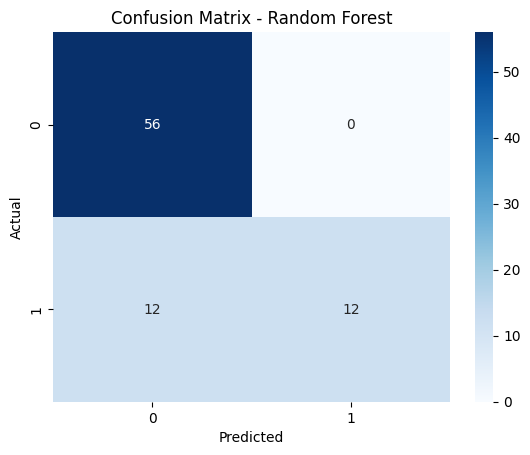

Model: XGBoost


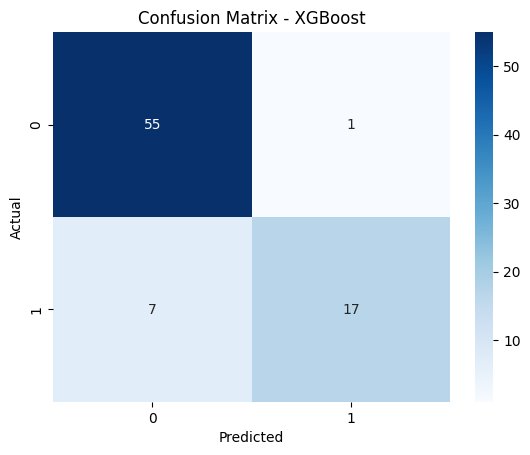

Model: LightGBM


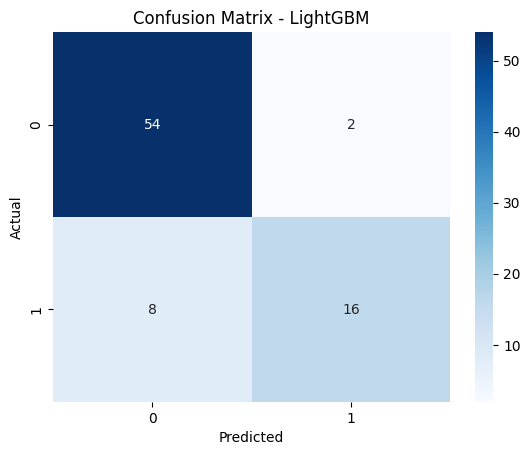

Model: Logistic Regression


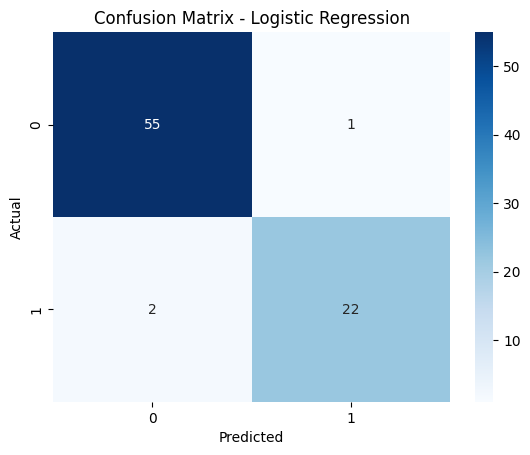

Model: SVM


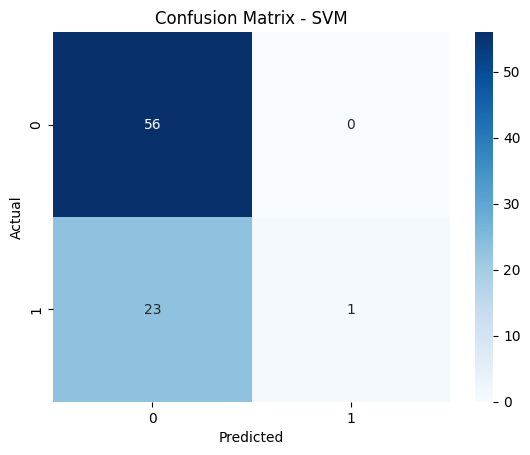

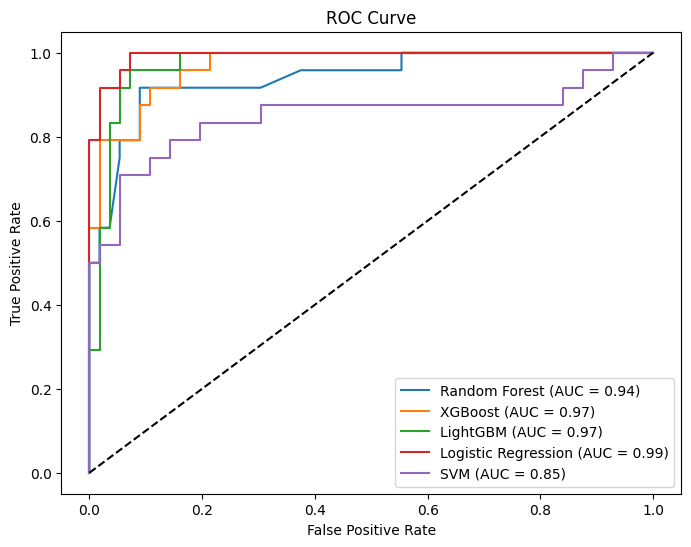

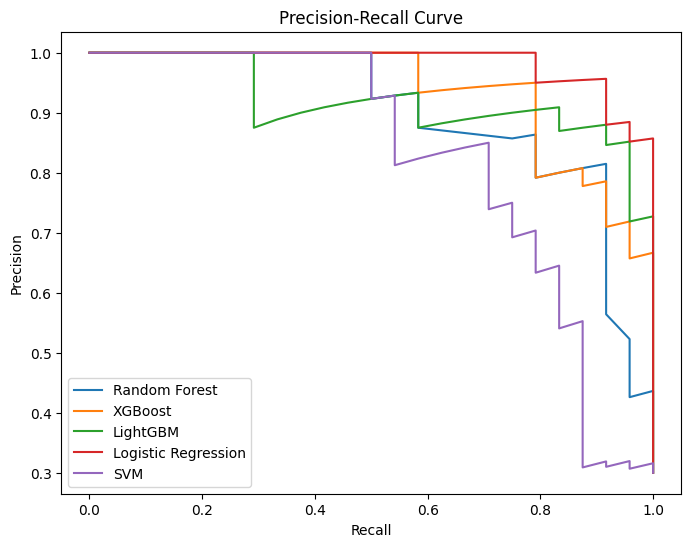

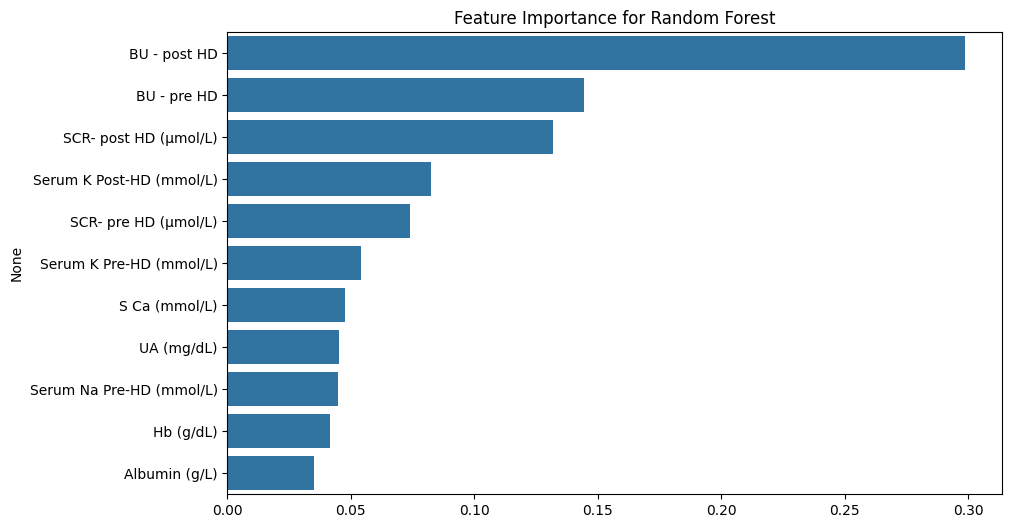

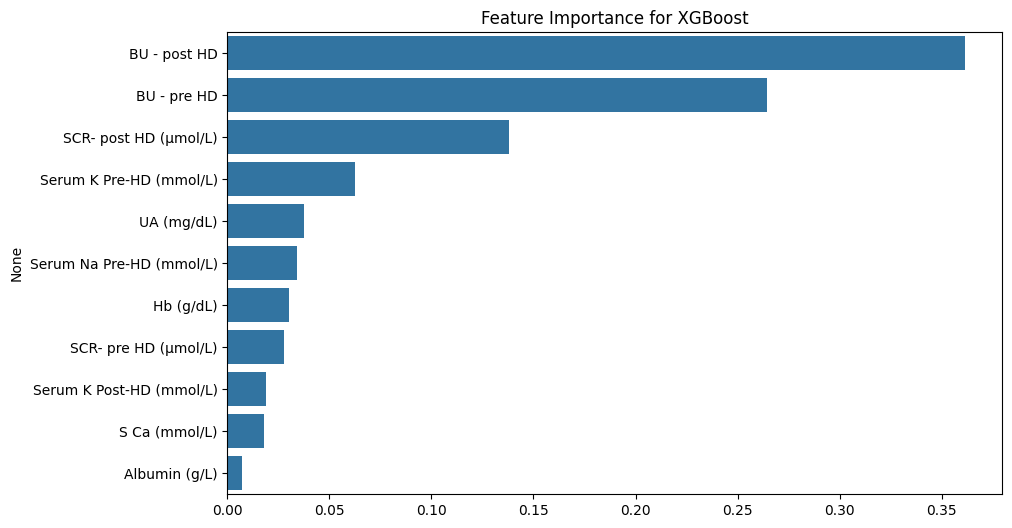

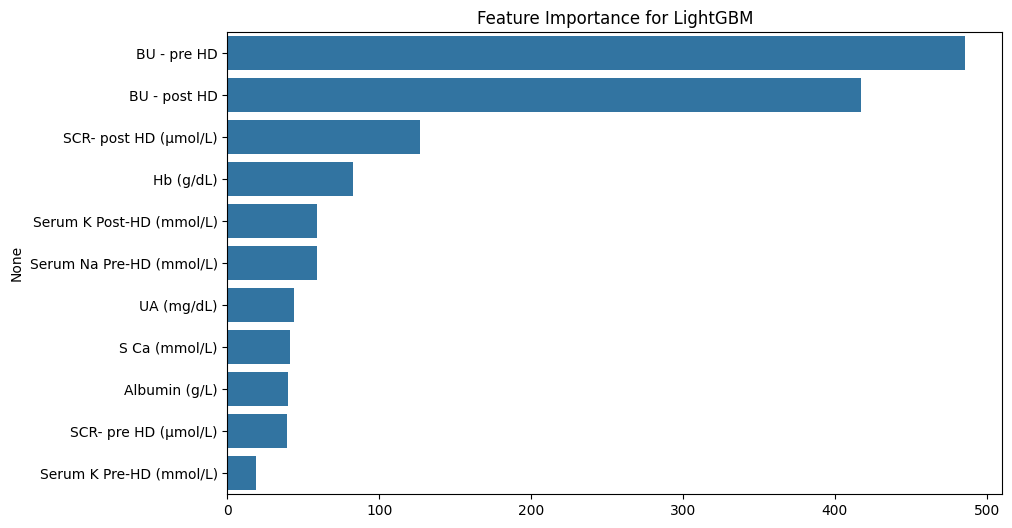

No feature importance available for Logistic Regression.
No feature importance available for SVM.


In [85]:
# Plot confusion matrices
for name, model in models.items():
    print(f"Model: {name}")
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, f'Confusion Matrix - {name}')

# Plot ROC curves
plot_roc_curve(models, X_test, y_test)

# Plot Precision-Recall curves
plot_precision_recall_curve(models, X_test, y_test)

# Plot feature importance for tree-based models
for name, model in models.items():
    plot_feature_importance(model, X_train, name)